In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# FICHERO DE CREACIÓN DE GRÁFICAS PARA EL TFM 

## Resultados simulación PVWatts

In [7]:
df = pd.read_csv('dataset/pvwatts_monthly.csv')

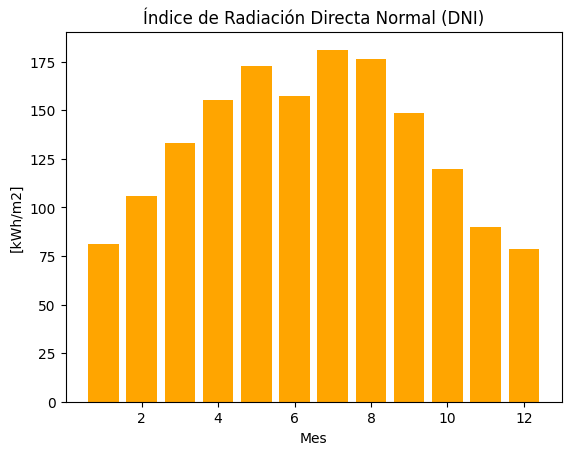

0      81.183932
1     105.719372
2     132.891955
3     155.057305
4     172.782909
5     157.494158
6     181.128296
7     176.187827
8     148.748192
9     119.505953
10     90.163570
11     78.613553
Name: Daily Average POA Irradiance (kWh/m2/day), dtype: float64


In [8]:
#conversión a valores mensuales de DNI (cos26)
df['Daily Average POA Irradiance (kWh/m2/day)'] = df['Daily Average POA Irradiance (kWh/m2/day)']*30/0.8987
 
plt.bar(df['Month'], df['Daily Average POA Irradiance (kWh/m2/day)'], color='orange')

plt.xlabel('Mes')
plt.ylabel('[kWh/m2]')
plt.title('Índice de Radiación Directa Normal (DNI)')

plt.show()
print(df['Daily Average POA Irradiance (kWh/m2/day)'])

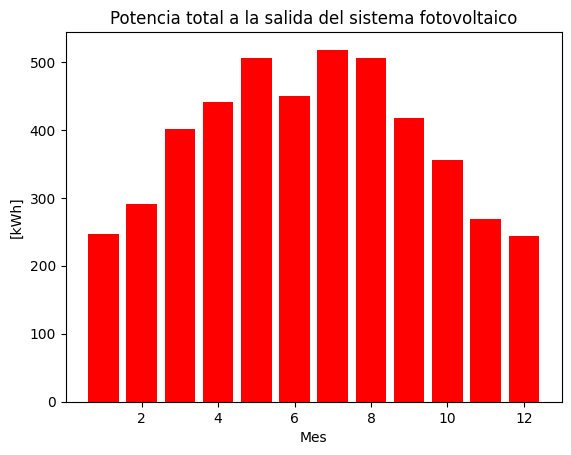

In [9]:
plt.bar(df['Month'], df['DC Array Output (kWh)'], color='red')

plt.xlabel('Mes')
plt.ylabel('[kWh]')
plt.title('Potencia total a la salida del sistema fotovoltaico')

plt.show()

## Representación all_loads.txt

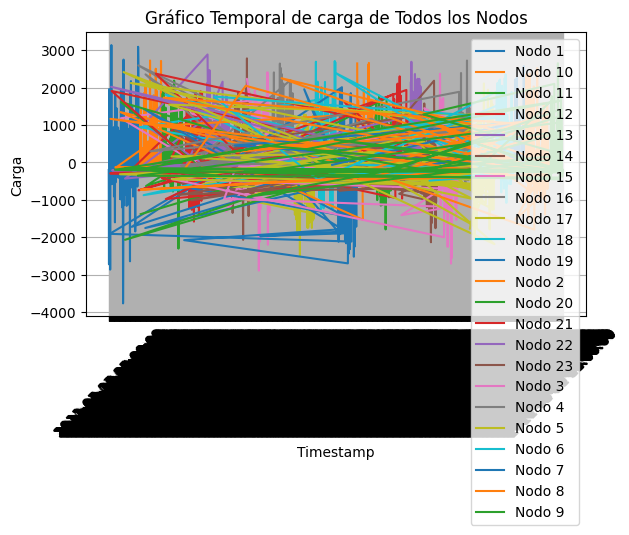

In [7]:
df = pd.read_csv('dataset/nodes/loads/all_loads.csv')
df_sampled = df.sample(frac=0.01, replace=False)

df['timestamp'] = pd.to_datetime(df['timestamp'])

for nodo in df['iid'].unique():
    datos_nodo = df_sampled[df_sampled['iid'] == nodo]
    plt.plot(datos_nodo['timestamp'], datos_nodo['dif'], label=f'Nodo {nodo}')


plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Carga')
plt.title('Gráfico Temporal de carga de Todos los Nodos')
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout() 
plt.show()

## Representación env+prod

In [3]:
df = pd.read_csv('dataset/env+prod.csv')
df['tmstp'] = pd.to_datetime(df['tmstp'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,tmstp,station_id,station,Temp,Hum,WS,WD,Pre,Cond,Evt,id,total,thermal,hydro,eolic,biomass,solar,datetime,hour
0,2010-07-01 00:00:00,1,LPMA,19.0,68.0,11.10,NNE,1023.0,Partly Cloudy,NaN,17377,98.22,79.66,9.30,4.22,4.83,0.0,2010-07-01,00:00:00
1,2010-07-01 00:00:00,2,LPPS,19.0,78.0,14.80,NNE,1023.0,Partly Cloudy,NaN,17377,98.22,79.66,9.30,4.22,4.83,0.0,2010-07-01,00:00:00
2,2010-07-01 00:30:00,1,LPMA,19.0,68.0,9.30,NNE,1022.0,Partly Cloudy,NaN,17379,89.87,71.30,9.28,5.79,4.35,0.0,2010-07-01,00:30:00
3,2010-07-01 00:30:00,2,LPPS,19.0,78.0,13.00,NNE,1023.0,Partly Cloudy,NaN,17379,89.87,71.30,9.28,5.79,4.35,0.0,2010-07-01,00:30:00
4,2010-07-01 01:00:00,1,LPMA,18.5,70.0,3.64,Variable,1022.0,Scattered Clouds,NaN,17381,84.46,67.37,7.34,5.53,4.39,0.0,2010-07-01,01:00:00


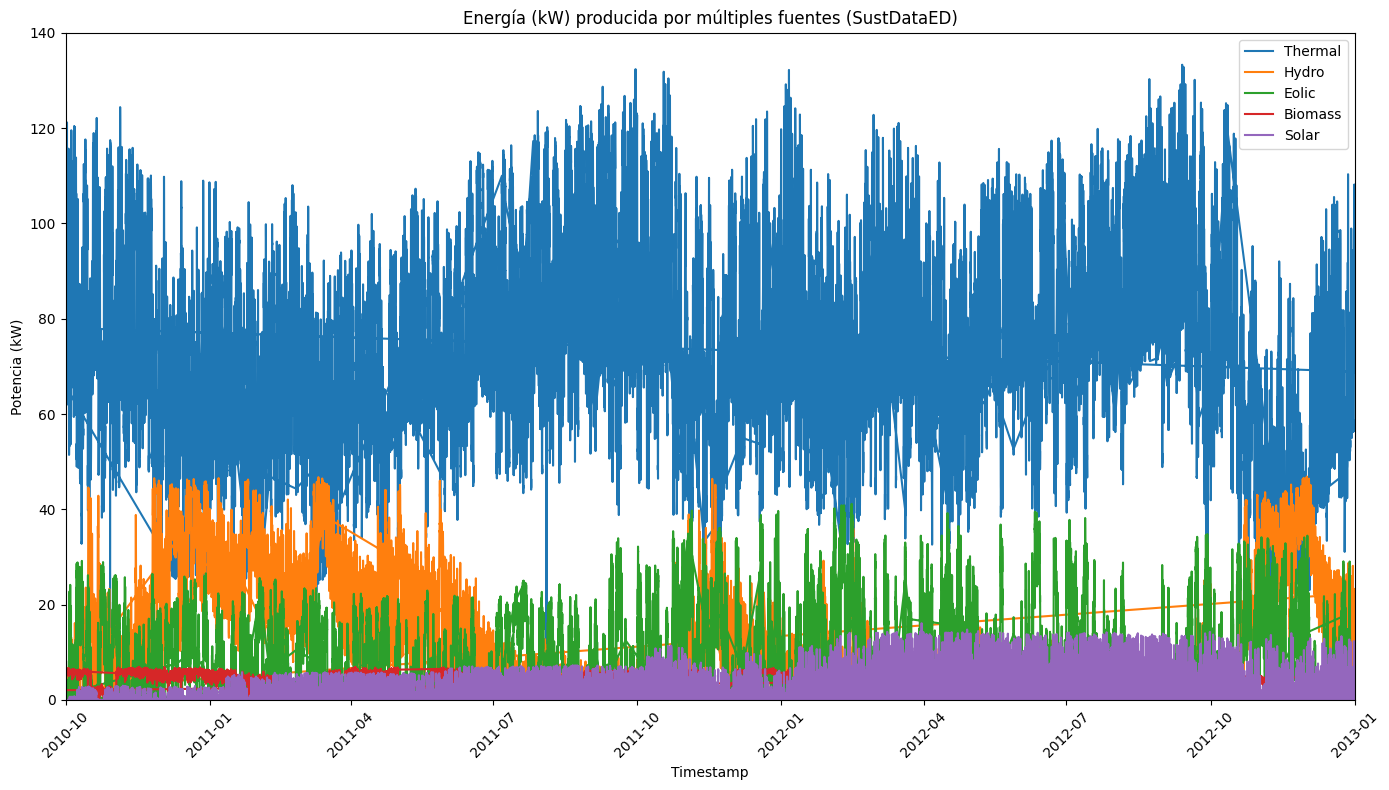

In [72]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df['tmstp'], df['thermal'], label='Thermal', linestyle='-')
ax.plot(df['tmstp'], df['hydro'], label='Hydro', linestyle='-')
ax.plot(df['tmstp'], df['eolic'], label='Eolic', linestyle='-')
ax.plot(df['tmstp'], df['biomass'], label='Biomass', linestyle='-')
ax.plot(df['tmstp'], df['solar'], label='Solar', linestyle='-')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Potencia (kW)')
ax.set_title('Energía (kW) producida por múltiples fuentes (SustDataED)')
ax.set_xlim(pd.Timestamp('2010-10-01'),pd.Timestamp('2013-01-01'))
ax.set_ylim(0,140)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

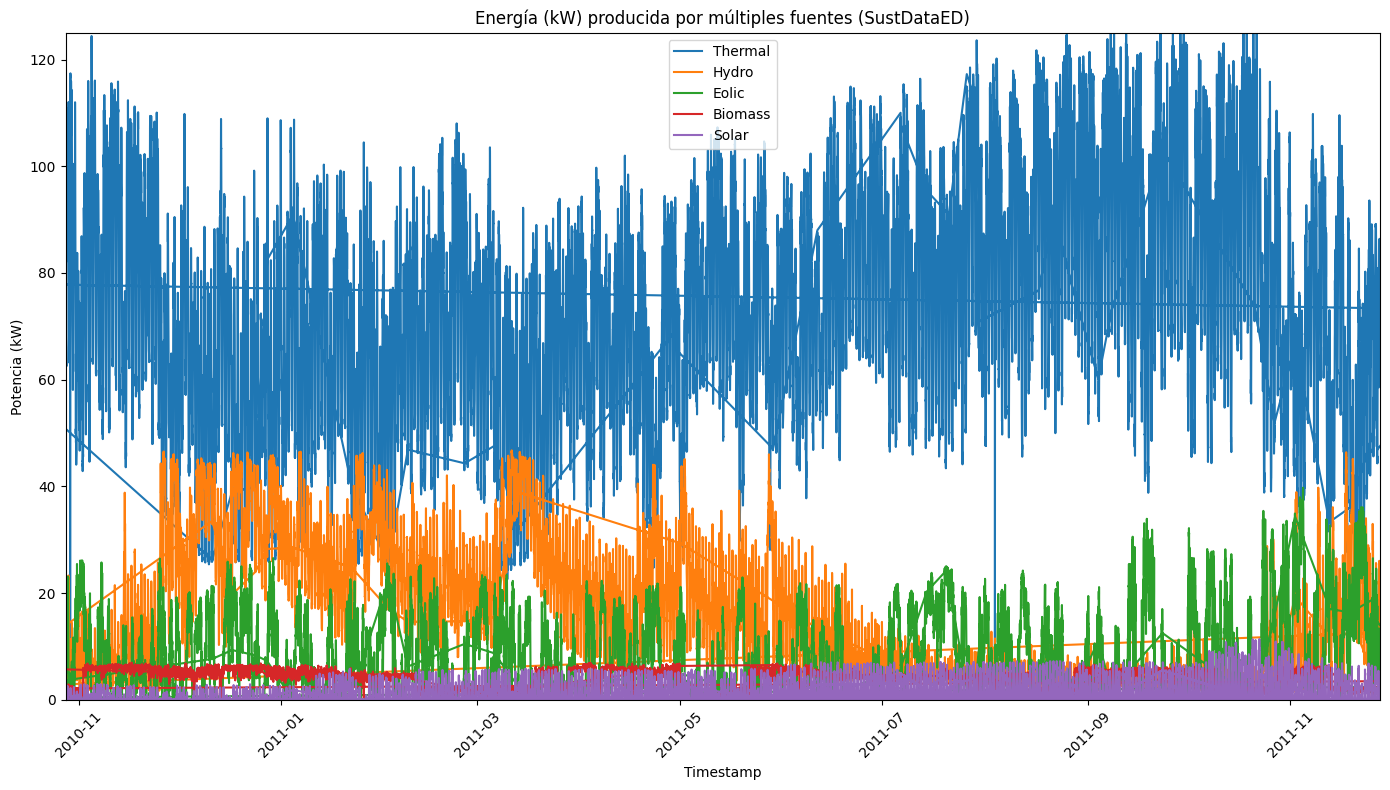

In [69]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(df['tmstp'], df['thermal'], label='Thermal', linestyle='-')
ax.plot(df['tmstp'], df['hydro'], label='Hydro', linestyle='-')
ax.plot(df['tmstp'], df['eolic'], label='Eolic', linestyle='-')
ax.plot(df['tmstp'], df['biomass'], label='Biomass', linestyle='-')
ax.plot(df['tmstp'], df['solar'], label='Solar', linestyle='-')

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel('Potencia (kW)')
ax.set_title('Energía (kW) producida por múltiples fuentes (SustDataED)')
ax.set_xlim(pd.Timestamp('2010-10-28'),pd.Timestamp('2011-11-28'))
ax.set_ylim(0,125)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

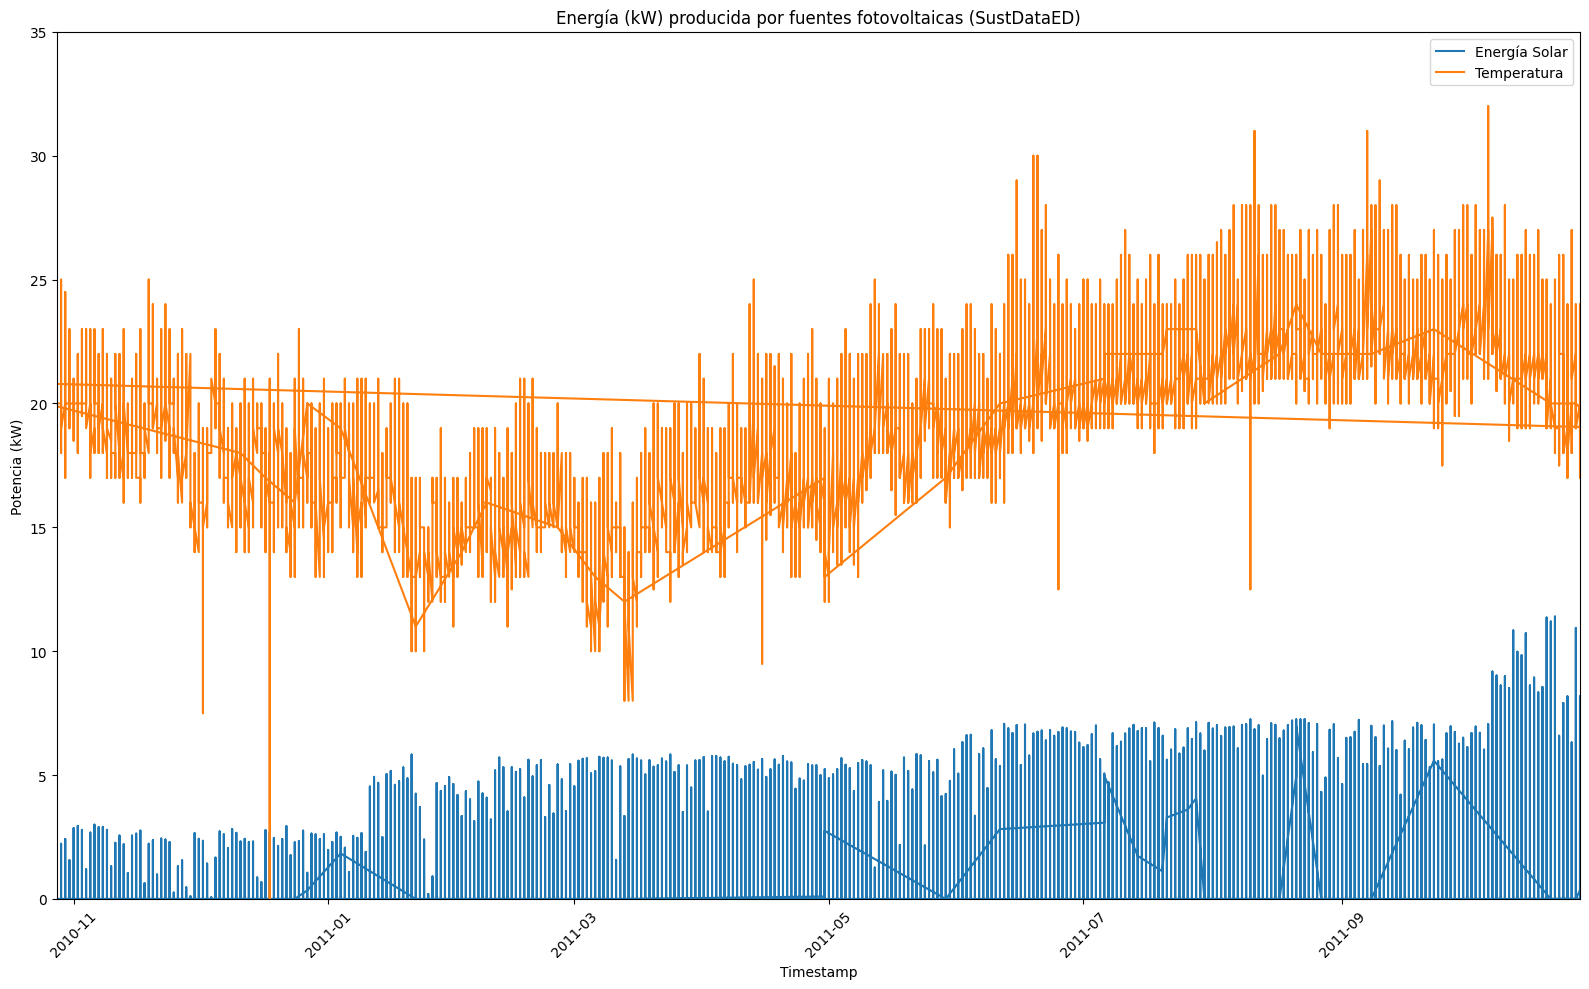

In [26]:
plt.subplots(figsize=(16, 10))

plt.plot(df['datetime'], df['Temp'], label='Temperatura', linestyle='-')

plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('T (ºC)')
plt.title('Temperatura en el rango temporal seleccionado (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-10-28'),pd.Timestamp('2011-10-28'))
plt.ylim(0,35)

plt.tight_layout()
plt.show()

In [ ]:
plt.subplots(figsize=(16, 10))

plt.plot(df['datetime'], df['solar'], label='Energía Solar', linestyle='-')

plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Potencia (kW)')
plt.title('Energía (kW) producida por fuentes fotovoltaicas en el rango temporal seleccionado (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-10-28'),pd.Timestamp('2011-10-28'))
plt.ylim(0,35)

plt.tight_layout()
plt.show()

## Representación mean_prod

In [ ]:
df = pd.read_csv('dataset/mean_prod.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

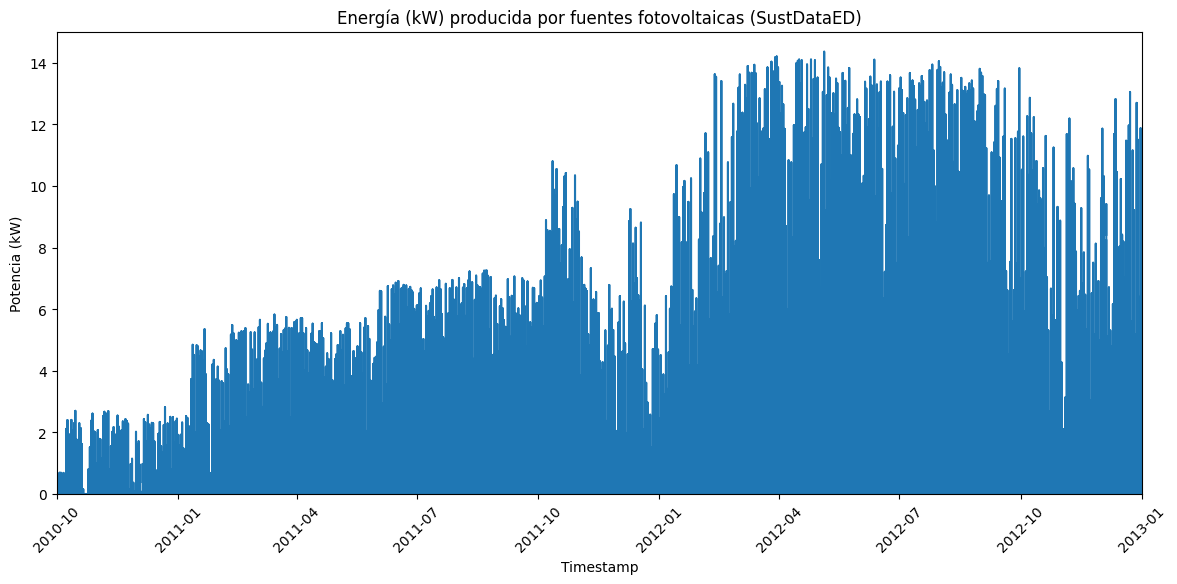

In [75]:
plt.subplots(figsize=(14, 6))

plt.plot(df['datetime'], df['solar'], label='Solar', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Potencia (kW)')
plt.title('Energía (kW) producida por fuentes fotovoltaicas (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-10-01'),pd.Timestamp('2013-01-01'))
plt.ylim(0,15)
plt.show()

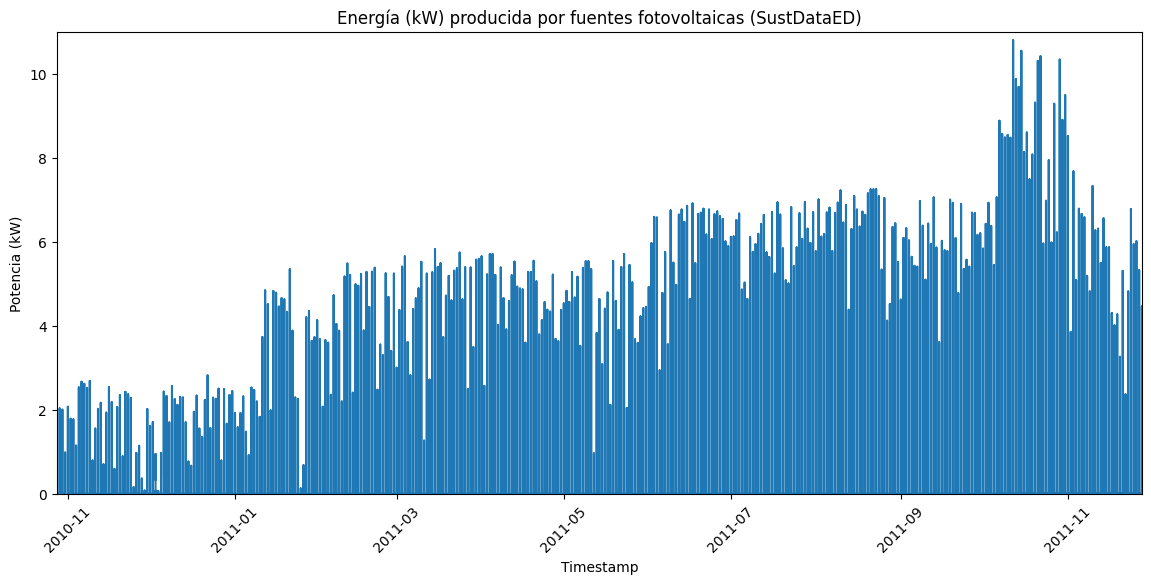

In [77]:
plt.subplots(figsize=(14, 6))

plt.plot(df['datetime'], df['solar'], label='Solar', linestyle='-')

plt.xlabel('Timestamp')
plt.ylabel('Potencia (kW)')
plt.title('Energía (kW) producida por fuentes fotovoltaicas (SustDataED)')
plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2010-10-28'),pd.Timestamp('2011-11-28'))
plt.ylim(0,11)
plt.show()

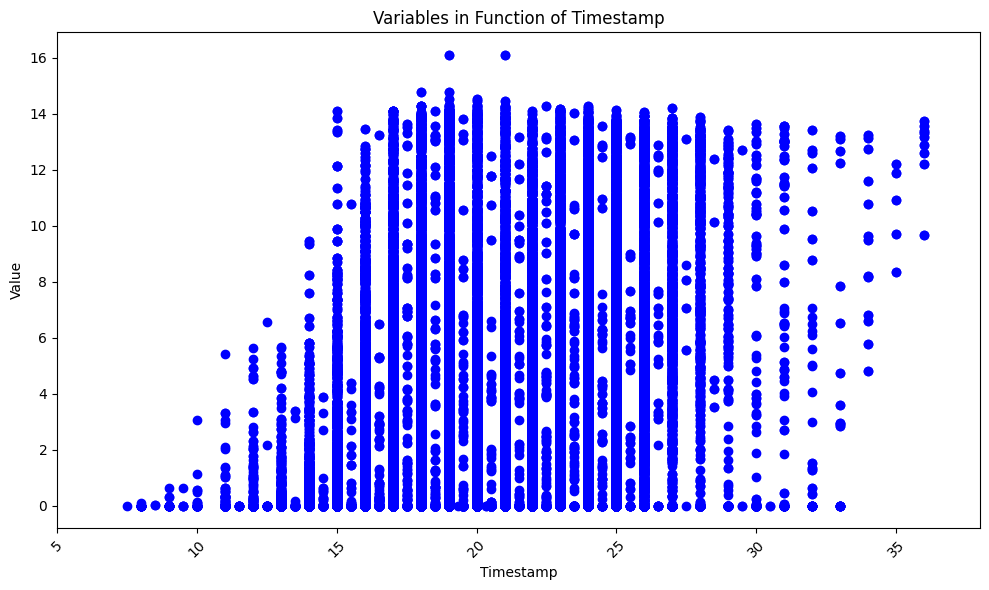

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temp'], df['solar'], color='blue')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Variables in Function of Timestamp')
plt.xticks(rotation=45)
plt.xlim(5,38)

plt.tight_layout()
plt.show()